# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

Общие формулы для градиентного спуска:

\begin{equation} \label{eq1}
\begin{split}
w_{new} & = w_{old} - \alpha \nabla_w L\:(w_{old}) \\
 \alpha & = f\:(k) \\
 f\:(k) & = \alpha_0
\end{split}
\end{equation}

Пусть $X$ &mdash; наш батч из $N$ строк объектов нашей обучающей выборки, $y$ &mdash; столбец соответствующих им значений целевой переменной.

Тогда перепишем $L(w)$:

$$L(w) = \frac{1}{N}\left(X\cdot w - y\right) \cdot \left(X\cdot w - y\right)^T + \frac{1}{C} w^T \cdot w$$

Тогда, воспользовавшись двумя правилами векторного дифференцирования из лекции, получаем:

$$ \nabla_w L\:(w) = \frac{2}{N} X^T \left( X \cdot w - y \right) + \frac{2}{C} w$$

Таким образом

$$w_{new} = w_{old} - \frac{2\alpha}{N} X^T (X \cdot w_{old} - y) - \frac{2\alpha}{C} w_{old}$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

Воспользуемся двумя относительно очевидными утверждениями

\begin{equation}
\begin{split}
\nabla_r \left\langle c,\: r \right\rangle & = \nabla_r \left\langle r,\: c \right\rangle = c \\
\nabla_r f(g(r)) & = \left.\frac{df}{dx}\right\vert_{x=g(r)} \cdot \nabla_r g(r)
\end{split}
\end{equation}

Пусть $L_i$ &mdash; потеря на $i$ - м объекте. Тогда:

$$L_i\:(w) = - y_i \log a_i - (1 - y_i) \log (1 - a_i) = -y_i \log \sigma(t_i) - (1 - y_i) \log (1 - \sigma(t_i)) =: f(t_i)$$

Тогда найдем градиент функции потерь на $i$ - м объекте:

$$\nabla_w L_i\:(w) = \frac{df}{dt_i} \cdot \nabla_w t_i = \frac{df}{dt_i} \cdot x_i$$ 

Найдем производную $f$:

$$\frac{df}{dt_i} = -\frac{(y_i - 1)\exp(t_i) + y_i}{1 + \exp(t_i)} = -\frac{(y_i - 1) + y_i \exp(-t_i)}{1 + \exp(-t_i)} = 
-\left[(y_i - 1)\sigma(t_i) + y_i \exp(-t_i) \sigma(t_i)\right] = -\left[(y_i - 1)\sigma(t_i) + y_i(1 - \sigma(t_i))\right] = \sigma(t_i) - y_i$$

Теперь найдем градиент $L\:(w)$:

$$\nabla_w L\:(w) = -\frac{1}{N}\left[\sum_i (y_i - \sigma(\left\langle x_i,\: w \right\rangle)) \: x_i \right] + \frac{2}{C} w$$

Определим $S(r)$:

\begin{equation}
\begin{split}
r & := \left(r_1, ..., r_n\right)^T \\
S\: (r) & := \left(\sigma(r_1), ..., \sigma(r_n)\right)^T
\end{split}
\end{equation}

Тогда градиент перепишется в следующем виде:

$$\nabla_w L\:(w) = \frac{1}{N} X^T \cdot (S\:(X \cdot w) - y) + \frac{2}{C} w$$

А это довольно сильно напоминает формулу для линейной регрессии

$$w_{new} = w_{old} - \frac{\alpha}{N} X^T \cdot (S\:(X \cdot w_{old}) - y) - \frac{2\alpha}{C} w_{old}$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

1) Чтобы посчитать Гессиан функции потерь, нам потребуются все ее вторые частные производные. Введем функцию $K\:(w)$ и заметим ее важное свойство:

\begin{equation}
\begin{split}
K\:(w)  :=& \frac{1}{N} \sum_i \left\langle x_i,\: w \right\rangle^2 \\
\frac{\partial\,^2 K}{\partial w_i \partial w_j} =& \frac{\partial\,^2 L}{\partial w_i \partial w_j} 
\end{split}
\end{equation}

Посчитаем первые и вторые частные производные функции $K\:(w)$ ($x^i$ &mdash; $i$-й столбец матрицы $X$, $x_{i,j}$ &mdash; $j$-й элемент $i$-й строки матрицы):

\begin{equation}
\begin{split}
\frac{\partial K}{\partial w_i} &= \frac{1}{N} \sum_k x_{k,i} \cdot 2 \left\langle x_k,\: w \right\rangle \\
\frac{\partial\,^2 K}{\partial w_i \partial w_j} &= \frac{2}{N} \sum_k x_{k,i} \cdot x_{k, j} = \frac{2}{N} \left\langle x^i,\: x^j \right\rangle
\end{split}
\end{equation}

Таким образом, Гессиан получился очень похож на матрицу Грама, образованной столбцами $X$.

$$H\:(L) = \frac{2}{N} G\:(x^1, \:..., x^m)$$

Поскольку столбцы по условию линейно независимы, матрица Грама положительно определена:

$$(v_1, ..., v_m) \cdot G\:(x^1, \:..., x^m) \cdot (v_1, ..., v_m)^T = (v_1 x^1 + ... + v_m x^m)^2 > 0, \: \left\Vert v \right\Vert \ne 0$$

Это значит, что мы нашли именно минимум.

2) Найдем теперь точное решение линейной регрессии с L2 регуляризацией. Для этого приравняем полученный ранее градиент к нулю, чтобы найти точку возможного минимума:

$$0 = \nabla_w L\:(w) = \frac{2}{N} X^T \left( X \cdot w - y \right) + \frac{2}{C} w = \left(\frac{2}{N} X^T X + \frac{2}{C}I\right) w - \frac{2}{N} X^T y$$

Таким образом

$$w = \left(X^T X + \frac{N}{C}I\right)^{-1} X^T y = \left(X^T X + \lambda I\right)^{-1} X^T y $$

Распишем Гессиан, используя знания из 1:

$$H\:(L) = \frac{2}{N} G\:(x^1, ..., x^m) + \frac{2}{C} I = \frac{2}{N} X^T X + \frac{2}{C} I = \frac{2}{N} \left( X^T X + \lambda I \right)$$

Поскольку в любом случае (если столбцы не являются линейно независимыми) первое слагаемое &mdash; квазизнакоположительная квадратичная форма, а второе &mdash; положительно определенная из-за $C > 0$, это положительно определенная квадратичная форма. Также точное решение можно считать по формуле, поскольку матрица становится обратимой. 


Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

Вверем обозначения:

$$p := p(y_i = 1 |x_i),\: a := a(x_i)$$.

Тогда матожидание перепишется в следующем виде:

$$E(L | x_i) = -p \log a - (1 - p) \log(1 - a)$$.

Возьмем от него первую и вторую производные по $a$:

\begin{equation}
\begin{split}
 \frac{dE}{da} &= \frac{1 - p}{1 - a} - \frac{p}{a}\\
 \frac{d^2 E}{da^2} &= \frac{1 - p}{(1 - a)^2} + \frac{p}{a^2}
\end{split}
\end{equation}

Приравняв первую производную к нулю, получим точку возможного экстремума:

$$\frac{1 - p}{1 - a} = \frac{p}{a} \Longrightarrow (1 - p)a = p (1 - a) \Longrightarrow a - pa = p - pa \Longrightarrow a = p$$

Убедимся, что это именно минимум, подставив $a = p$ во вторую производную:

$$\frac{1 - p}{(1 - a)^2} + \frac{p}{a^2} = \frac{1 - p}{(1 - p)^2} + \frac{p}{p^2} = \frac{1}{p} + \frac{1}{1 - p} > 0$$


Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Да, нужно. В противном случае наша модель сможет бесконтрольно настраивать этот коэффициент на обучающей выборке. Слишком большое значение коэффициента $w_0$, вероятно, должно свидетельствовать о переобучении. Кажется, что переобучение будет возникать каждый раз, когда обучающая выборка достаточно сильно удалена от начала координат.

<img src="images/overfit.png">

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
from sklearn.utils import shuffle as shuffler

In [7]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    assert X.shape[0] == y.shape[0], "array sizes must be equal"
    n_samples = X.shape[0]
    
    if shuffle:
        X, y = shuffler(X, y, random_state=None)
    
    for i in range(0, n_samples, batch_size):
        if n_samples - i >= batch_size:
            X_batch = X[i: i + batch_size:]
            y_batch = y[i: i + batch_size:]
            yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [9]:
%load_ext pycodestyle_magic

In [10]:
# %%pycodestyle
def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    # Your code Here
    return 1 / (1 + np.exp(-x))


class MySGDClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, batch_generator, C=1, alpha=0.01,
                 max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.weights = None
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        reg = 1.0 / self.C * np.linalg.norm(self.weight)
        assert X_batch.shape[0] == y_batch.shape[0], ("array sizes"
                                                      "must be equal")
        n_samples = X_batch.shape[0]
        
        if self.model_type == "lin_reg":
            mse = 1.0 / n_samples * np.linalg.norm(
                np.dot(X_batch, self.weight) - y_batch
            )
            return mse + reg 
        elif self.model_type == "log_reg":
            a = sigmoid(np.dot(X_batch, self.weight))
            log_loss = -1.0 / n_samples * np.sum(
                y_batch * np.log(a) + (1 - y_batch) * np.log(1 - a)
            )
            return log_loss + reg
        else:
            raise RuntimeError(
                "unsupported model_type {}".format(self.model_type)
            )
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (
        то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        assert X_batch.shape[0] == y_batch.shape[0], ("array sizes"
                                                      "must be equal")
        n_samples = X_batch.shape[0]
        
        if self.model_type == "lin_reg":
            return 2.0 / n_samples * np.dot(
                X_batch.T, np.dot(X_batch, self.weight) - y_batch
            ) + 2.0 / self.C * self.weight 
        elif self.model_type == "log_reg":
            return 1.0 / n_samples * np.dot(
                X_batch.T, sigmoid(np.dot(X_batch, self.weight)) - y_batch
            ) + 2.0 / self.C * self.weight
        else:
            raise RuntimeError(
                "unsupported model_type {}".format(self.model_type)
            )
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        
        self.weight = self.weight - self.alpha * new_grad
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        # Нужно инициализровать случайно веса
        
        np.random.seed(239)
        self.weight = np.random.sample(X.shape[1])
        
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать 
                # ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        assert self.weight is not None, "you should call fit before"
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        if self.model_type == "lin_reg":
            return np.dot(X, self.weight)
        elif self.model_type == "log_reg":
            return sigmoid(np.dot(X, self.weight))
        else:
            raise RuntimeError(
                "unsupported model_type {}".format(self.model_type)
            )
     

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [11]:
def plot_decision_boundary(clf):
    # Your code Here
    w0, w1, w2, *_ = clf.weight
    # w1 * x1 + w2 * x2 + w0 = 0
    # r = t * (-w2, w1) + r0
    # r0 = (w0 / w1, 0) if w2 == 0 else (0, w0 / w2)
    r0 = np.array((-w0 / w1, 0) if w2 == 0 else (0, -w0 / w2))[::, np.newaxis]
    T_MAX = 100.0
    r = np.array([-w2, w1])[::, np.newaxis]
    r = r / np.linalg.norm(r)
    xy = r0 + r * np.linspace(-T_MAX, T_MAX, num=100)[np.newaxis, ::]
    plt.plot(xy[0, ::], xy[1, ::])

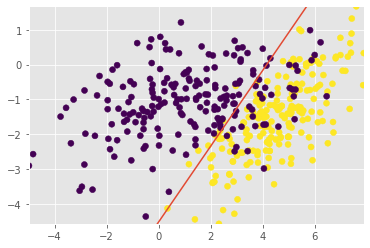

In [14]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

from functools import partial
clf = MySGDClassifier(
    partial(batch_generator, batch_size=10, shuffle=True),
    model_type="log_reg", max_epoch=300, C=100, alpha=0.1
)
clf.fit(X, y)
plot_decision_boundary(clf)

plt.xlim((X[:,0].min(), X[:,0].max()))
plt.ylim((X[:,1].min(), X[:,1].max()))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [15]:
from operator import itemgetter
from itertools import groupby

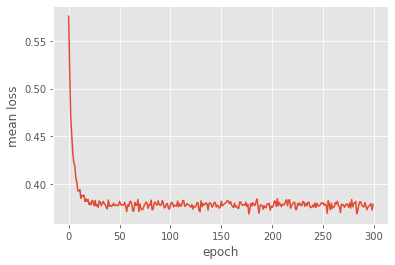

In [16]:
seq = zip(clf.errors_log["iter"], clf.errors_log["loss"])

groups = []
ls = sorted(seq, key=itemgetter(0))
for k, g in groupby(ls, key=itemgetter(0)):
    groups.append(list(map(itemgetter(1), g)))
ar = np.array(groups)
plt.plot(ar.mean(axis=0))
plt.xlabel("epoch")
plt.ylabel("mean loss")
# ax1.set_ylim((0, 0.6))
# ax2.set_ylim((0, 0.6))
plt.show()

In [17]:
clf.weight

array([-2.36458648,  0.5692362 , -0.52236488])

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [18]:
from sklearn.datasets import make_classification

In [19]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

alpha = 0.100 done
alpha = 0.060 done
alpha = 0.036 done
alpha = 0.022 done
alpha = 0.013 done
alpha = 0.008 done
alpha = 0.005 done
alpha = 0.003 done
alpha = 0.002 done
alpha = 0.001 done


[]

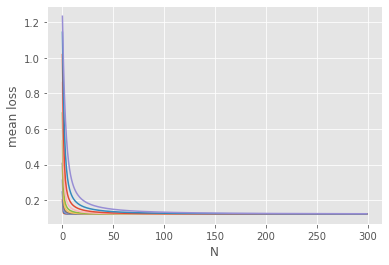

In [27]:
for alpha in np.logspace(-1, -3, 10):
    clf = MySGDClassifier(
        partial(batch_generator, batch_size=400, shuffle=True),
        model_type="log_reg", max_epoch=300, C=100, alpha=alpha
    )
    clf.fit(X, y)
    seq = zip(clf.errors_log["iter"], clf.errors_log["loss"])

    groups = []
    ls = sorted(seq, key=itemgetter(0))
    for k, g in groupby(ls, key=itemgetter(0)):
        groups.append(list(map(itemgetter(1), g)))
    ar = np.array(groups)
    plt.plot(ar.mean(axis=0))
    print("alpha = {:.3f} done".format(alpha))

plt.xlabel("N")
plt.ylabel("mean loss")
plt.plot()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

C = 1000.000 done
C = 215.443 done
C = 46.416 done
C = 10.000 done
C = 2.154 done
C = 0.464 done
C = 0.100 done
C = 0.022 done
C = 0.005 done


/home/lev/Sphere/IntroductionToDataAnalysisAndDataMining/spherePy/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log
/home/lev/Sphere/IntroductionToDataAnalysisAndDataMining/spherePy/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in multiply


C = 0.001 done


[]

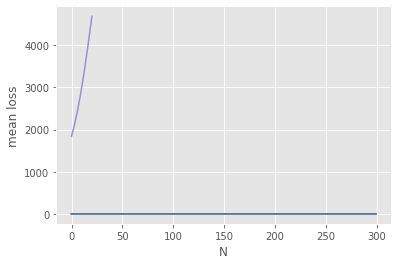

In [28]:
for C in np.logspace(3, -3, 10):
    clf = MySGDClassifier(
        partial(batch_generator, batch_size=400, shuffle=True),
        model_type="log_reg", max_epoch=300, C=C, alpha=0.001
    )
    clf.fit(X, y)
    seq = zip(clf.errors_log["iter"], clf.errors_log["loss"])

    groups = []
    ls = sorted(seq, key=itemgetter(0))
    for k, g in groupby(ls, key=itemgetter(0)):
        groups.append(list(map(itemgetter(1), g)))
    ar = np.array(groups)
    plt.plot(ar.mean(axis=0))
    print("C = {:.3f} done".format(C))

plt.xlabel("N")
plt.ylabel("mean loss")
plt.plot()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [4]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [5]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [6]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [10]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***